

---


Nombre de los integrantes

- Cruz Pérez Joshua Santiago
- Hernández Banda Oziel
- Jimenez Borzani Naomi Daniela
- Paredes Hernández Ximena


---





---


Programar los m ́etodos de:
a) Bisección.
b) Secante.
c) Newton.


---



In [3]:
import numpy as np
import matplotlib.pyplot as plt

def Newton(x0, f, df):
    """
    Método de Newton para encontrar raíces de una función.

    Este método utiliza la derivada de la función para generar sucesivas aproximaciones
    a la raíz mediante iteraciones de la forma:
        x_{k+1} = x_k - f(x_k)/f'(x_k)

    Parámetros:
    x0 : float
        Aproximación inicial (punto de partida)
    f : function
        Función objetivo (debe ser derivable)
    df : function
        Función derivada de f

    Retorna:
    list : Lista de todas las aproximaciones generadas durante el proceso

    Notas:
    - La convergencia no está garantizada si la derivada es cercana a cero
    - Puede diverger si el punto inicial está lejos de la raíz
    - Se incluye límite de 100 iteraciones para prevenir bucles infinitos
    """
    tol = 1e-8  # Tolerancia para convergencia
    max_iter = 100  # Límite de iteraciones para prevenir bucles infinitos
    xx = [x0]  # Lista para almacenar todas las aproximaciones
    k = 0  # Contador de iteraciones

    # Primera iteración
    f0 = f(x0)  # Evaluar función en punto inicial
    df0 = df(x0)  # Evaluar derivada en punto inicial
    xx.append(x0 - f0 / df0)  # Calcular primera aproximación (x1)

    # Iterar hasta convergencia o hasta alcanzar máximo de iteraciones
    while abs(xx[k+1] - xx[k]) > tol and k < max_iter:
        k += 1  # Incrementar contador
        fk = f(xx[k])  # Evaluar función en aproximación actual
        dfk = df(xx[k])  # Evaluar derivada en aproximación actual
        xx.append(xx[k] - fk / dfk)  # Calcular nueva aproximación

    return xx


def secante(x0, x1, f):
    """
    Método de la Secante para encontrar raíces de una función.

    Versión sin derivadas que utiliza aproximaciones sucesivas basadas en dos puntos previos.
    La iteración sigue la fórmula:
        x_{k+1} = x_k - f(x_k)*(x_k - x_{k-1})/(f(x_k) - f(x_{k-1}))

    Parámetros:
    x0 : float
        Primera aproximación inicial
    x1 : float
        Segunda aproximación inicial
    f : function
        Función objetivo

    Retorna:
    list : Lista de todas las aproximaciones generadas

    Notas:
    - No requiere derivada (solo evaluaciones de función)
    - Maneja división por cero deteniendo el proceso
    - Convergencia superlineal pero menos robusta que Newton
    """
    tol = 1e-8  # Tolerancia para convergencia
    max_iter = 100  # Máximo de iteraciones permitidas
    xx = [x0, x1]  # Lista con aproximaciones (dos puntos iniciales)
    k = 1  # Contador de iteraciones (comienza en 1 para acceder a índices)

    # Realizar hasta max_iter iteraciones
    for _ in range(max_iter):
        f0 = f(xx[k])  # Evaluar en punto actual
        f1 = f(xx[k-1])  # Evaluar en punto anterior

        # Prevenir división por cero (diferencia de valores de función insignificante)
        if abs(f0 - f1) < 1e-15:
            break

        # Calcular nueva aproximación usando fórmula de la secante
        x_new = xx[k] - f0 * (xx[k] - xx[k-1]) / (f0 - f1)
        xx.append(x_new)  # Almacenar nueva aproximación

        # Verificar si se alcanzó convergencia
        if abs(xx[-1] - xx[-2]) < tol:
            break

        k += 1  # Incrementar contador para siguiente iteración

    return xx


def biseccion(a, b, f):
    """
    Método de Bisección para encontrar raíces en un intervalo.

    Requiere que la función cambie de signo en el intervalo [a, b].
    En cada iteración divide el intervalo a la mitad y selecciona el subintervalo
    donde ocurre el cambio de signo.

    Parámetros:
    a : float
        Extremo izquierdo del intervalo inicial
    b : float
        Extremo derecho del intervalo inicial (debe cumplir f(a)*f(b) < 0)
    f : function
        Función continua donde buscar la raíz

    Retorna:
    list : Lista de todos los puntos medios calculados

    Excepciones:
    ValueError : Si no hay cambio de signo en los extremos del intervalo

    Notas:
    - Convergencia garantizada para funciones continuas con cambio de signo
    - Convergencia lineal (más lento que Newton o Secante)
    - Cada iteración reduce el intervalo a la mitad
    """
    # Verificar condición fundamental del método
    if f(a) * f(b) >= 0:
        raise ValueError("La función debe tener signos opuestos en los extremos del intervalo")

    tol = 1e-8  # Tolerancia (tamaño mínimo del intervalo)
    max_iter = 100  # Límite de seguridad para iteraciones
    m = []  # Lista para almacenar puntos medios
    iter_count = 0  # Contador de iteraciones

    # Iterar hasta que el intervalo sea menor que la tolerancia
    while b - a > tol and iter_count < max_iter:
        m_aux = (a + b) / 2.0  # Calcular punto medio
        m.append(m_aux)  # Almacenar punto medio

        # Seleccionar subintervalo donde cambia el signo
        if f(a) * f(m_aux) < 0:
            b = m_aux  # La raíz está en [a, m_aux]
        else:
            a = m_aux  # La raíz está en [m_aux, b]

        iter_count += 1  # Incrementar contador

    return m


def graficar_funcion(f, a, b, raiz=None, titulo=""):
    """
    Genera una gráfica de la función f en el intervalo [a, b].

    Parámetros:
    - f (func): función a graficar
    - a (float): límite inferior
    - b (float): límite superior
    - raiz (float): raíz estimada a marcar en la gráfica (opcional)
    - titulo (str): título de la gráfica
    """
    x = np.linspace(a, b, 400)
    y = f(x)
    plt.figure()
    plt.plot(x, y, label='f(x)')
    plt.axhline(0, color='black', linestyle='--')
    if raiz is not None:
        plt.plot(raiz, f(raiz), 'ro', label=f'Raíz ≈ {raiz:.6f}')
    plt.title(titulo)
    plt.xlabel('x')
    plt.ylabel('f(x)')
    plt.legend()
    plt.grid(True)
    plt.show()

Aproximaciones: [1.0, 1.5, 1.4166666666666667, 1.4142156862745099, 1.4142135623746899, 1.4142135623730951]
Última aproximación: 1.4142135623730951
--------------------
Aproximaciones: [1.0, 1.5, 1.4, 1.4137931034482758, 1.4142156862745099, 1.4142135620573204, 1.4142135623730947]
Última aproximación: 1.4142135623730947
Cantidad de iteraciones: 5
--------------------
Puntos medios calculados: [1.5, 1.25, 1.375, 1.4375, 1.40625, 1.421875, 1.4140625, 1.41796875, 1.416015625, 1.4150390625, 1.41455078125, 1.414306640625, 1.4141845703125, 1.41424560546875, 1.414215087890625, 1.4141998291015625, 1.4142074584960938, 1.4142112731933594, 1.4142131805419922, 1.4142141342163086, 1.4142136573791504, 1.4142134189605713, 1.4142135381698608, 1.4142135977745056, 1.4142135679721832, 1.414213553071022, 1.4142135605216026]
Última aproximación: 1.4142135605216026
Valor de la función en la aproximación: -5.236811428943611e-09


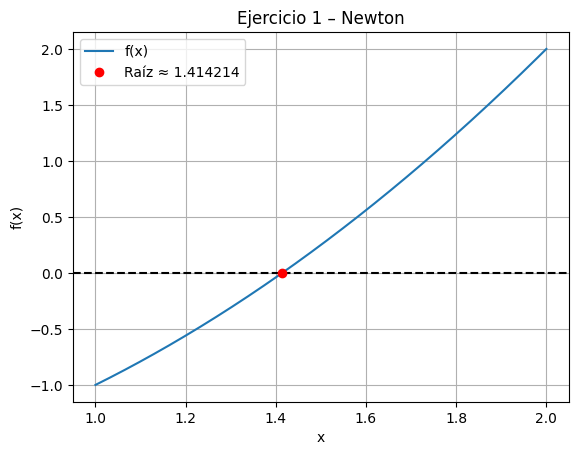

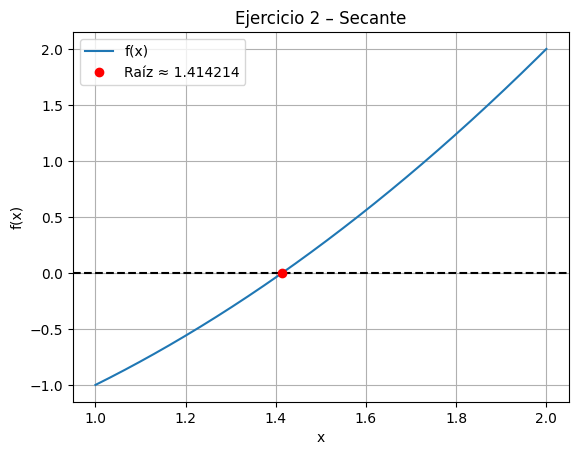

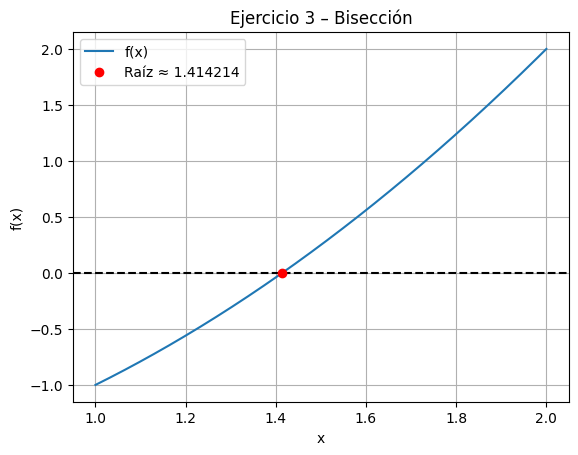

In [4]:
# Definir la función y su derivada
f = lambda x: x**2 - 2
df = lambda x: 2*x

# Llamar al método de Newton
resultado1 = Newton(1.0, f, df)
print("Aproximaciones:", resultado1)
print("Última aproximación:", resultado1[-1])

print("--------------------")
# Llamar al método de la secante con puntos iniciales
resultado2 = secante(1.0, 1.5, f)

print("Aproximaciones:", resultado2)
print("Última aproximación:", resultado2[-1])
print("Cantidad de iteraciones:", len(resultado2) - 2)  # Restamos los puntos iniciales

print("--------------------")
# Llamar al método de bisección
resultados3 = biseccion(1.0, 2.0, f)

print("Puntos medios calculados:", resultados3)
print("Última aproximación:", resultados3[-1])
print("Valor de la función en la aproximación:", f(resultados3[-1]))

raices1 = resultado1
raices2 = resultado2
raices3 = resultados3

graficar_funcion(f, 1, 2, raices1[-1], "Ejercicio 1 – Newton")
graficar_funcion(f, 1, 2, raices2[-1], "Ejercicio 2 – Secante")
graficar_funcion(f, 1, 2, raices3[-1], "Ejercicio 3 – Bisección")

